<a href="https://colab.research.google.com/github/Manikandan0925/NLP-Text-classification-Project/blob/main/NLP_Process_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import lib
# 2. Dataset
# 3. EDA
# 4. Text data Processing
# 5. Transforming Tokens to vectors
# 6. Text Classification models - Classifier

# import

In [5]:
import numpy as np
import pandas as pd

# Text processing
import re
import string
import nltk
from nltk.corpus import stopwords

#sklearn
from sklearn import preprocessing, model_selection, decomposition, pipeline, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import f1_score
#pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

# dataset

In [6]:
train = pd.read_csv("/content/train (3).csv")
print("Training data set size: ", train.shape)


Training data set size:  (7613, 5)


In [7]:
train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
test = pd.read_csv("/content/test (3).csv")
print("Test data set size: ", test.shape)


Test data set size:  (3263, 4)


In [9]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# EDA

In [10]:
#1. Missing Values

In [11]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [13]:
#Exploring the column - Target
#disaster -> predict its 1, not predict its 0

train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

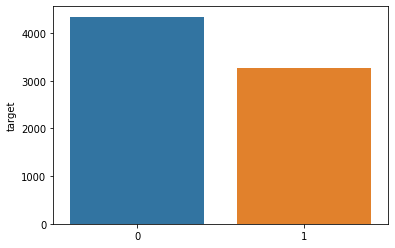

In [14]:
sns.barplot(train['target'].value_counts().index,train['target'].value_counts() )

In [15]:
disaster_tweet = train[train['target']==1]['text']
non_disaster_tweet = train[train['target']==0]['text']

In [16]:
disaster_tweet.values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [17]:
non_disaster_tweet.values[1]

'I love fruits'

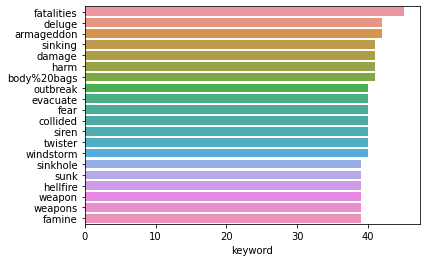

In [18]:
#Exploring the column - keyword
sns.barplot(y = train['keyword'].value_counts()[:20].index,x = train['keyword'].value_counts()[:20] )


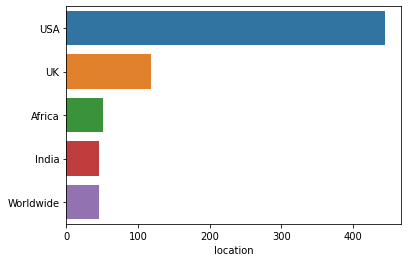

In [19]:
#Exploring the column - location
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)
sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5])

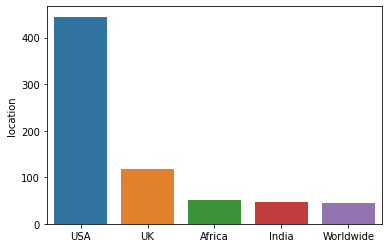

In [20]:
sns.barplot(y=train['location'].value_counts()[:5],x=train['location'].value_counts()[:5].index)

# 4. Text Preprocessing

In [21]:
#1. Data Cleaning
# lower, remove noise, Token, Stopwords
train['text'][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [22]:
#1. Data Cleaning
# lower, remove noise
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

train['text']=train['text'].apply(lambda x:clean_text(x))
test['text']=test['text'].apply(lambda x:clean_text(x))
train['text'][:5]

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

Text(0.5, 1.0, 'Non-Disaster Tweets')

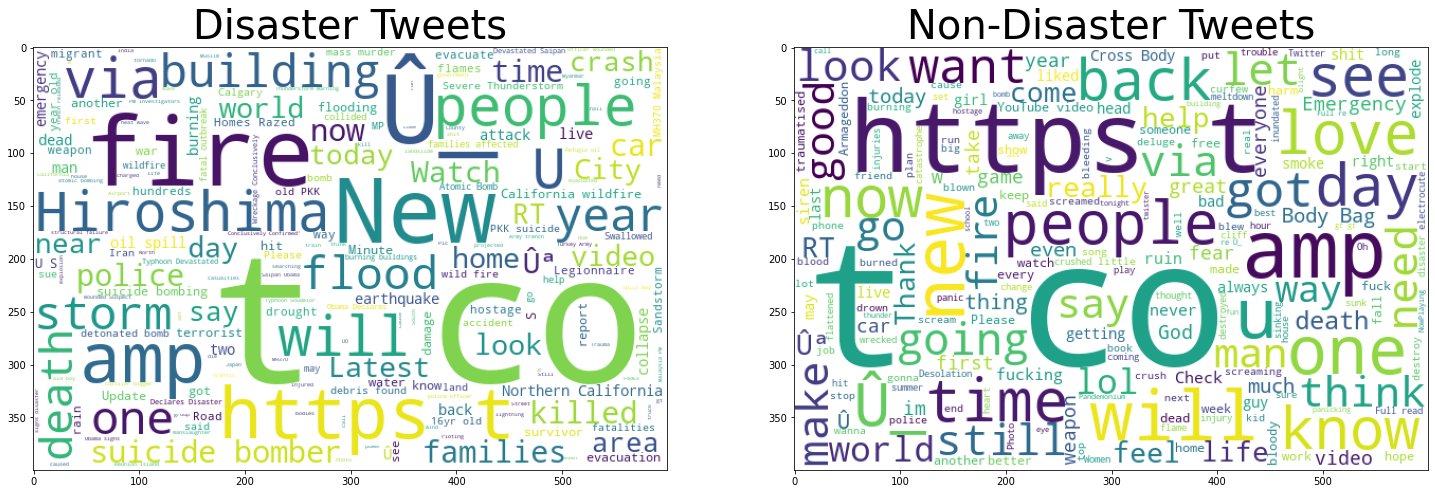

In [23]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [25,10])

# ax1=> disaster_tweet
wordcloud1 = WordCloud(background_color = "white",
                      width = 600,
                      height = 400).generate(" ".join(disaster_tweet))
ax1.imshow(wordcloud1)
ax1.set_title("Disaster Tweets", fontsize = 40)


#ax2 = > non_disaster_tweet
wordcloud2 = WordCloud(background_color = "white",
                      width = 600,
                      height = 400).generate(" ".join(non_disaster_tweet))
ax2.imshow(wordcloud2)
ax2.set_title("Non-Disaster Tweets", fontsize = 40)

In [24]:
#2. Tokenization
text = "Are you going, aren't you"
token1 = nltk.tokenize.WhitespaceTokenizer()
token2 = nltk.tokenize.TreebankWordTokenizer()
token3 = nltk.tokenize.WordPunctTokenizer()
token4 = nltk.tokenize.RegexpTokenizer(r'\w+')
print("Exmaple:  ", text)
print("___________________________________")

print("1. ", token1.tokenize(text))
print()
print("2. ", token2.tokenize(text))
print()
print("3. ", token3.tokenize(text))
print()
print("4. ", token4.tokenize(text))




Exmaple:   Are you going, aren't you
___________________________________
1.  ['Are', 'you', 'going,', "aren't", 'you']

2.  ['Are', 'you', 'going', ',', 'are', "n't", 'you']

3.  ['Are', 'you', 'going', ',', 'aren', "'", 't', 'you']

4.  ['Are', 'you', 'going', 'aren', 't', 'you']


In [25]:
tokens = nltk.tokenize.RegexpTokenizer(r'\w+')
train['text'] = train['text'].apply(lambda x: tokens.tokenize(x))
test['text'] = test['text'].apply(lambda x: tokens.tokenize(x))

In [26]:
train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [28]:
#3. Stopword
nltk.download('stopwords')
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

train['text'] = train['text'].apply(lambda x: remove_stopwords(x))
test['text'] = test['text'].apply(lambda x: remove_stopwords(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [32]:
#4. Normalization
nltk.download('wordnet')
nltk.download('omw-1.4')
# Stemming, Lemmatization

text = "feet cats wolves talked"

tokenizer =nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

#stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming of the input text: ", " ". join(stemmer.stem(token) for token in tokens))

#Lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
print("Lemmatizing the input text: ", " ". join(lemmatizer.lemmatize(token)for token in tokens))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Stemming of the input text:  feet cat wolv talk
Lemmatizing the input text:  foot cat wolf talked


In [33]:
def combine_text(list_text):
    combined_text = " ".join(list_text)
    return combined_text


train['text'] = train['text'].apply(lambda x: combine_text(x))
test['text'] = test['text'].apply(lambda x: combine_text(x))


In [34]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [35]:
# Getting it all together

def text_preprocess(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    clean_data= clean_text(text)
    tokenized_text = tokenizer.tokenize(clean_data)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.word('english')]
    combined_text = " ". join(remove_stopwords)
    return combined_text

# 5. Transforming tokens to vector

In [36]:
# 1. Bag of Words

In [37]:
#Countvector
count_vectorizer = CountVectorizer()
train_vector = count_vectorizer.fit_transform(train['text'])
test_vector = count_vectorizer.transform(test['text'])

print(train_vector[0].todense())

[[0 0 0 ... 0 0 0]]


In [38]:
#tfidf
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range=(1,2))
train_tfidf = tfidf.fit_transform(train['text'])
test_tfidf = tfidf.transform(test['text'])

# 6. Building Text Classification  - Model

In [39]:
#Logistic
#fitting 
clf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf,train_vector, train["target"], cv=5, scoring='f1' )
scores

array([0.59865255, 0.49611063, 0.57166948, 0.56290774, 0.68789809])

In [40]:
clf.fit(train_vector, train["target"])

LogisticRegression()

In [41]:
#tfidf
clf_tfidf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf_tfidf,train_tfidf, train["target"], cv=5, scoring='f1' )
scores

array([0.57229525, 0.49673203, 0.54277829, 0.46618106, 0.64768683])

In [42]:
# Naives Bayes
clf_NB = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB,train_vector, train["target"], cv=5, scoring='f1' )
scores

array([0.63149079, 0.60675773, 0.68575519, 0.64341085, 0.72505092])

In [43]:
#tfidf
clf_NB_tfidf = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB_tfidf,train_tfidf, train["target"], cv=5, scoring='f1' )
scores

array([0.57590597, 0.57092511, 0.61135371, 0.5962963 , 0.7393745 ])

In [44]:
#XGBoost
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(max_depth = 7, n_estimators = 200, colsample_bytree = 0.8, subsample = 0.8, nthread = 10, learning_rate = 0.1)
scores = model_selection.cross_val_score(clf_xgb,train_vector, train["target"], cv=5, scoring='f1' )
scores


array([0.47379913, 0.37379576, 0.43988816, 0.38900634, 0.53142857])

In [45]:
import xgboost as xgb

clf_xgb_tfidf = xgb.XGBClassifier(max_depth = 7, n_estimators = 200, colsample_bytree = 0.8, subsample = 0.8, nthread = 10, learning_rate = 0.1)
scores = model_selection.cross_val_score(clf_xgb_tfidf,train_tfidf, train["target"], cv=5, scoring='f1' )
scores

array([0.48947951, 0.34406439, 0.43140965, 0.40084388, 0.53014354])